# **Introduction**

# Table of Contents
1. [Introduction](#introduction)
2. [Data Preparation](#Data-Preparation)
3. [Customer Segmentation](#Customer-Segmentation)
    - [RFM-Based Customer Segmentation](#RFM-Based-Customer-Segmentation)
    - [Nationality and Age Based Segmentation](#Nationality-and-Age-Based-Segmentation)
4. [Behavioral Patterns and Preference Analysis](#Behavioral-Patterns-and-Preference-Analysis)
    - [Spending Behavior](#Spending-Behavior)
    - [Room Preferences](#Room-Preferences)
    - [Lead Time](#Lead-Time)
    - [Cancellation and No-Show Rates](#Cancellation-and-No-Show-Rates)
5. [Channel and Market Analysis](#Channel-and-Market-Analysis)

# **Data Preparation**

In [1082]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [1083]:
file_path = '../Data/HotelCustomersDataset.xlsx'
hotel_df = pd.read_excel(file_path)

In [1084]:
hotel_df.head(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.00,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.00,105.30,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.00,53.00,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.00,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.00,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.00,60.00,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.00,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [1085]:
hotel_df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [1086]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [1087]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,83590.00,41795.50,24130.50,1.00,20898.25,41795.50,62692.75,83590.00
Age,79811.00,45.40,16.57,-11.00,34.00,46.00,57.00,122.00
DaysSinceCreation,83590.00,453.64,313.39,0.00,177.00,397.00,723.00,1095.00
AverageLeadTime,83590.00,66.20,87.76,-1.00,0.00,29.00,103.00,588.00
LodgingRevenue,83590.00,298.80,372.85,0.00,59.00,234.00,402.00,21781.00
OtherRevenue,83590.00,67.59,114.33,0.00,2.00,38.50,87.67,7730.25
BookingsCanceled,83590.00,0.00,0.07,0.00,0.00,0.00,0.00,9.00
BookingsNoShowed,83590.00,0.00,0.03,0.00,0.00,0.00,0.00,3.00
BookingsCheckedIn,83590.00,0.79,0.70,0.00,1.00,1.00,1.00,66.00
PersonsNights,83590.00,4.65,4.57,0.00,1.00,4.00,6.00,116.00


In [1088]:
# Rename column names to snake_case for convenience.
hotel_df.columns = (
    hotel_df.columns
    .str.replace('([a-z])([A-Z])', r'\1_\2', regex=True)
    .str.replace('([A-Z]+)([A-Z][a-z])', r'\1_\2', regex=True)
    .str.lower()
    .str.strip('_')
)

In [1089]:
# Check for duplicates in `id` column to ensure customer id can be used as key and has no duplicates.
hotel_df['id'].duplicated().sum()

np.int64(0)

In [1090]:
# Check for null values in all columns.
hotel_df.isnull().sum()

id                              0
nationality                     0
age                          3779
days_since_creation             0
name_hash                       0
doc_id_hash                     0
average_lead_time               0
lodging_revenue                 0
other_revenue                   0
bookings_canceled               0
bookings_no_showed              0
bookings_checked_in             0
persons_nights                  0
room_nights                     0
days_since_last_stay            0
days_since_first_stay           0
distribution_channel            0
market_segment                  0
sr_high_floor                   0
sr_low_floor                    0
sr_accessible_room              0
sr_medium_floor                 0
sr_bathtub                      0
sr_shower                       0
sr_crib                         0
sr_king_size_bed                0
sr_twin_bed                     0
sr_near_elevator                0
sr_away_from_elevator           0
sr_no_alcohol_

In [1091]:
# Examine negative values for age
# Replace with null if data is invalid or misrepresenting
hotel_df.loc[hotel_df['age'] < 0, 'age'].unique()

array([ -7.,  -9., -11., -10.,  -6.,  -1.])

In [1092]:
hotel_df.loc[hotel_df['age'] < 0, 'age'] = np.nan

In [1093]:
hotel_df['age'] = hotel_df['age'].replace("", np.nan)

In [1094]:
if hotel_df['age'].dropna().apply(float.is_integer).all():
    hotel_df['age'] = hotel_df['age'].astype('Int64')

In [1095]:
# Set display option for Pandas DataFrame to show two decimal places for `lodging_revenue` and `other_revenue`
float_cols = hotel_df.select_dtypes(include=['float'])
hotel_df[float_cols.columns] = hotel_df[float_cols.columns].round(2)
pd.options.display.float_format = '{:.2f}'.format

In [1096]:
# Check for inconsistent encodings in categorical variables
categorical_columns = ['distribution_channel', 'market_segment', 'nationality']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(hotel_df[col].unique())

Unique values in distribution_channel:
['Corporate' 'Travel Agent/Operator' 'Direct' 'Electronic Distribution']
Unique values in market_segment:
['Corporate' 'Travel Agent/Operator' 'Other' 'Direct' 'Complementary'
 'Groups' 'Aviation']
Unique values in nationality:
['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'CYP' 'ARG' 'ARM'
 'CHL' 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV'
 'JOR' 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE'
 'AND' 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT'
 'IDN' 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM'
 'BOL' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'A

In [1097]:
# Remove unnecessary columns
hotel_df.drop(['name_hash', 'doc_id_hash'], axis=1, inplace=True)

In [1098]:
hotel_df.head()

,id,nationality,age,days_since_creation,average_lead_time,lodging_revenue,other_revenue,bookings_canceled,bookings_no_showed,bookings_checked_in,...,sr_medium_floor,sr_bathtub,sr_shower,sr_crib,sr_king_size_bed,sr_twin_bed,sr_near_elevator,sr_away_from_elevator,sr_no_alcohol_in_mini_bar,sr_quiet_room
0,1,PRT,51,150,45,371.00,105.30,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,<NA>,1095,61,280.00,53.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60,1095,93,240.00,60.00,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

# **Customer Segmentation**

some explanation about customer segmentation

## RFM-Based Customer Segmentation

> Some explanation about this rfm based segmentation
>
> ***Recency*** - `days_since_last_stay`
> 
> ***Frequency*** - `bookings_checked_in` 
> 
> ***Monetary*** - `lodging_revenue` + `other_revenue`

In [1099]:
rfm_filter = (
    (hotel_df['bookings_checked_in'] == 0) &
    (hotel_df['bookings_no_showed'] == 0) &
    (hotel_df['bookings_canceled'] == 0)
)
hotel_df[rfm_filter]

,id,nationality,age,days_since_creation,average_lead_time,lodging_revenue,other_revenue,bookings_canceled,bookings_no_showed,bookings_checked_in,...,sr_medium_floor,sr_bathtub,sr_shower,sr_crib,sr_king_size_bed,sr_twin_bed,sr_near_elevator,sr_away_from_elevator,sr_no_alcohol_in_mini_bar,sr_quiet_room
2,3,DEU,31,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,49,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,FRA,42,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,11,IRL,27,1095,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83581,83582,DEU,48,0,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83583,83584,PRT,49,0,0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83585,83586,ITA,54,0,0,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83587,83588,IRL,53,0,0,0.00,0.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0


As observed, there is a considerable number of customers who have neither canceled, no-showed, nor completed a booking. 

This likely includes individuals whose check-in dates have not yet arrived or those who abandoned the booking process before completion. 

Including these rows in the RFM analysis could dilute the results, as these customers do not actively contribute to the metrics of Recency, Frequency, or Monetary value. To ensure the analysis remains focused, these rows will be excluded from the RFM calculations. 

In [1100]:
hotel_df['total_revenue'] = hotel_df['lodging_revenue'] + hotel_df['other_revenue']
rfm = hotel_df.loc[~rfm_filter, ['id','days_since_last_stay', 'bookings_checked_in', 'total_revenue']].copy()

In [1101]:
def rfm_score(value, quantiles, column_name):
    if column_name == 'days_since_last_stay':
        if value <= 90:
            return 4
        elif value <= 180:
            return 3
        elif value <= 365:
            return 2
        elif value <= 1080:
            return 1
        else:
            return 0 # Over 3 years may indicate churn risk        
    elif column_name == 'bookings_checked_in':
        if value >= 10:
            return 4
        elif value >= 5:
            return 3
        elif value >= 2:
            return 2
        else:
            return 1
    else:
        if value <= 100:
            return 1
        elif value <= 500:
            return 2
        elif value <= 1000:
            return 3
        else:
            return 4

**Scoring Thresholds in `rfm_score`**
> **Recency (R)**
>
> The `days_since_last_stay` variable revealed distinct clusters, such as **920 days** and **472 days**.
>
> There exists many values where customers haven’t stayed for years, indicating they may have churned.
>
> To reflect engagement levels and potential churn risk, the following thresholds were applied:
> 
>  *0–90 days → Score 4*
> 
> *91–180 days → Score 3*
>
> *181–365 days → Score 2*
>
> *366–1080 days (1–3 years)→ Score 1*
> 
> *over 1080 days (>3years)→ Score 0 (likely churned)*


> **Frequency (F)**
>
> The `bookings_checked_in` variable displayed a highly skewed distribution. **Most customers had only 1 booking**, while very few had multiple bookings.
>
> To account for this imbalance, the following thresholds were applied:
>
> *0 or 1 bookings → Score 1 (low frequency)*
>
> *2 to 4 bookings → Score 2*
>
> *5 to 9 bookings → Score 3*
>
> *10 or more bookings → Score 4 (high frequency)*


> **Monetary (M)**
>
> The `total_revenue` variable showed a concentration of modest spending (around **€200**), with smaller clusters at mid-range and high spending levels.
> 
> To differentiate customers by their financial contributions, the following thresholds were applied:
> 
> *€0–€100 → Score 1 (Minimal spenders, often casual customers or single-stay guests)*
>
> *€0-€100 → Score 1*
>
> *€101-€500 → Score 2*
>
> *€501-€1000 → Score 3*
>
> *€1000 → Score 4*

In [1102]:
print(rfm['bookings_checked_in'].value_counts())
print(rfm['days_since_last_stay'].value_counts())
print(rfm['total_revenue'].value_counts())

bookings_checked_in
1     62215
2      1147
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
13        4
12        4
15        3
29        3
23        2
14        2
0         1
19        1
18        1
24        1
20        1
25        1
40        1
57        1
26        1
17        1
66        1
34        1
Name: count, dtype: int64
days_since_last_stay
 920     203
 472     196
 477     165
 938     158
 97      156
        ... 
-1         1
 473       1
 1102      1
 0         1
 1085      1
Name: count, Length: 1105, dtype: int64
total_revenue
234.00     296
0.00       286
248.80     205
302.00     200
182.00     190
          ... 
2180.50      1
1968.00      1
737.10       1
546.75       1
990.30       1
Name: count, Length: 16769, dtype: int64


In [1103]:
rfm['R'] = rfm['days_since_last_stay'].apply(rfm_score, args=(quantiles, 'days_since_last_stay'))
rfm['F'] = rfm['bookings_checked_in'].apply(rfm_score, args=(quantiles, 'bookings_checked_in'))
rfm['M'] = rfm['total_revenue'].apply(rfm_score, args=(quantiles, 'total_revenue'))

# RFM scores into columns `RFM_segment` and `RFM_score`
rfm['RFM_segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)

In [1104]:
rfm.head()

,id,days_since_last_stay,bookings_checked_in,total_revenue,R,F,M,RFM_segment,RFM_score
0,1,151,3,476.30,3,2,2,322,7
1,2,1100,1,333.00,0,1,2,012,3
3,4,1100,1,300.00,0,1,2,012,3
5,6,1097,1,254.00,0,1,2,012,3
7,8,1100,1,629.00,0,1,3,013,4


In [1105]:
r_dist = rfm['R'].value_counts().sort_index()
f_dist = rfm['F'].value_counts().sort_index()
m_dist = rfm['M'].value_counts().sort_index()

# Print distributions
print("Recency (R) Distribution:\n", r_dist)
print("\nFrequency (F) Distribution:\n", f_dist)
print("\nMonetary (M) Distribution:\n", m_dist)

Recency (R) Distribution:
 R
0      327
1    41480
2    10954
3     6021
4     4889
Name: count, dtype: int64

Frequency (F) Distribution:
 F
1    62216
2     1338
3       75
4       42
Name: count, dtype: int64

Monetary (M) Distribution:
 M
1     3046
2    39926
3    15671
4     5028
Name: count, dtype: int64


In [1106]:
def assign_segment(row):
    # VIP Guests
    if row['R'] == 4 and row['F'] >= 3 and row['M'] >= 3:
        return 'VIP Guests'
    # Frequent Guests
    elif row['R'] >= 2 and (row['F'] >= 2 or row['M'] >= 2):
        return 'Frequent Guests'
    # New Guests
    elif row['R'] >= 3 and row['F'] <= 2:
        return 'New Guests'
    # Occasional Guests
    elif row['R'] <= 2 and row['F'] <= 2 and row['M'] <= 2:
        return 'Occasional Guests'
    # Seasonal Spenders
    elif row['R'] == 1 and row['M'] >= 2:
        return 'Seasonal Spenders'
    # Infrequent Loyalists
    elif row['R'] == 4 and row['F'] == 1:
        return 'Infrequent Loyalists'
    # Inactive Guests
    elif row['R'] == 0 and row['F'] == 1 and row['M'] == 1:
        return 'Inactive Guests'
    # Default
    else:
        return 'Other'

# Apply segmentation
rfm['segment'] = rfm.apply(assign_segment, axis=1)

# Check segment counts
print(rfm['segment'].value_counts())

segment
Occasional Guests    29651
Frequent Guests      21056
Seasonal Spenders    12463
New Guests             415
Other                   53
VIP Guests              33
Name: count, dtype: int64


## Nationality and Age Based Segmentation

not yet performed

---

# **Behavioral Patterns and Preference Analysis**

## Spending Behavior

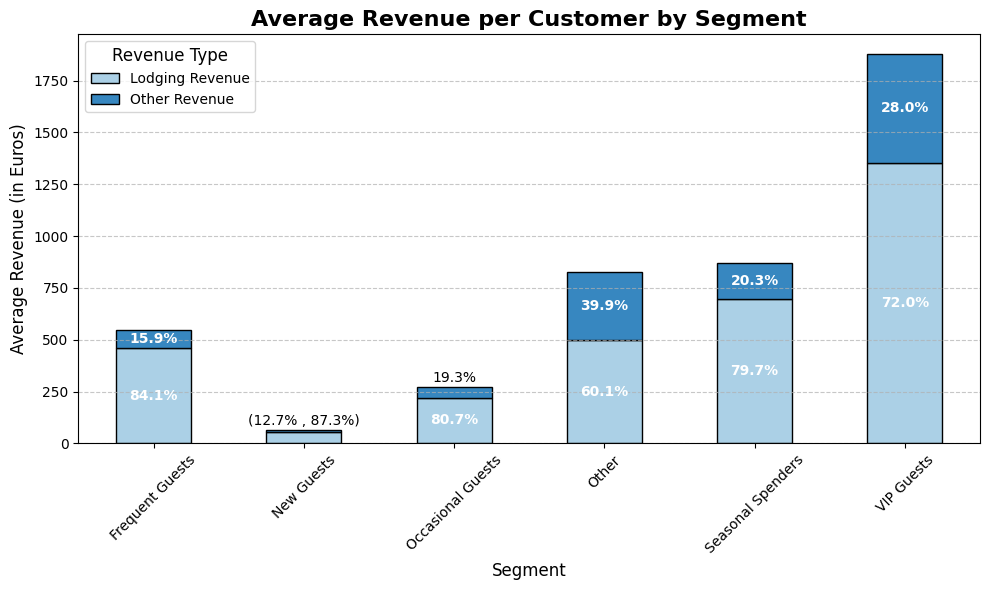

In [1107]:
hotel_df = hotel_df.merge(rfm[['id', 'segment']], on='id', how='left')

customer_counts = hotel_df['segment'].value_counts()
# Normalize revenue by dividing by customer count
segment_revenue['customers'] = customer_counts
segment_revenue['avg_lodging_revenue'] = segment_revenue['lodging_revenue'] / segment_revenue['customers']
segment_revenue['avg_other_revenue'] = segment_revenue['other_revenue'] / segment_revenue['customers']

# Percentages
total_revenue = segment_revenue['avg_lodging_revenue'] + segment_revenue['avg_other_revenue']
lodging_percentage = (segment_revenue['avg_lodging_revenue'] / total_revenue) * 100
other_percentage = (segment_revenue['avg_other_revenue'] / total_revenue) * 100

# Absolute value threshold for annotations
value_threshold = 70 
bar_spacing = 8 

color_palette = sns.color_palette("Blues", n_colors=2)

ax = segment_revenue[['avg_lodging_revenue', 'avg_other_revenue']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=color_palette,
    edgecolor='black'
)

# Percentage annotation
for i, (lodging_value, other_value, lodging, other) in enumerate(zip(
    segment_revenue['avg_lodging_revenue'], segment_revenue['avg_other_revenue'],
    lodging_percentage, other_percentage
)):
    # Total bar height
    total_height = lodging_value + other_value

    if lodging_value >= value_threshold:
        ax.text(i, lodging_value / 2,  # Inside the bar
                f'{lodging:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    if lodging_value < value_threshold and other_value < value_threshold:
        ax.text(i, total_height + bar_spacing,  # Extra spacing for small bars
                f'({other:.1f}% , {lodging:.1f}%)', ha='center', va='bottom', color='black', fontsize=10)
    elif other_value >= value_threshold:
        ax.text(i, lodging_value + (other_value / 2),  # Inside the bar
                f'{other:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    else:
        # Place outside with standard spacing
        ax.text(i, total_height + bar_spacing,
                f'{other:.1f}%', ha='center', va='bottom', color='black', fontsize=10)



plt.title('Average Revenue per Customer by Segment', fontsize=16, weight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Revenue (in Euros)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Revenue Type', labels=['Lodging Revenue', 'Other Revenue'], fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### NOTES FOR ME: If "Frequent Guests" spend significantly less on Other Revenue, this could indicate an opportunity to upsell dining, spa, or other services.

## Room Preferences

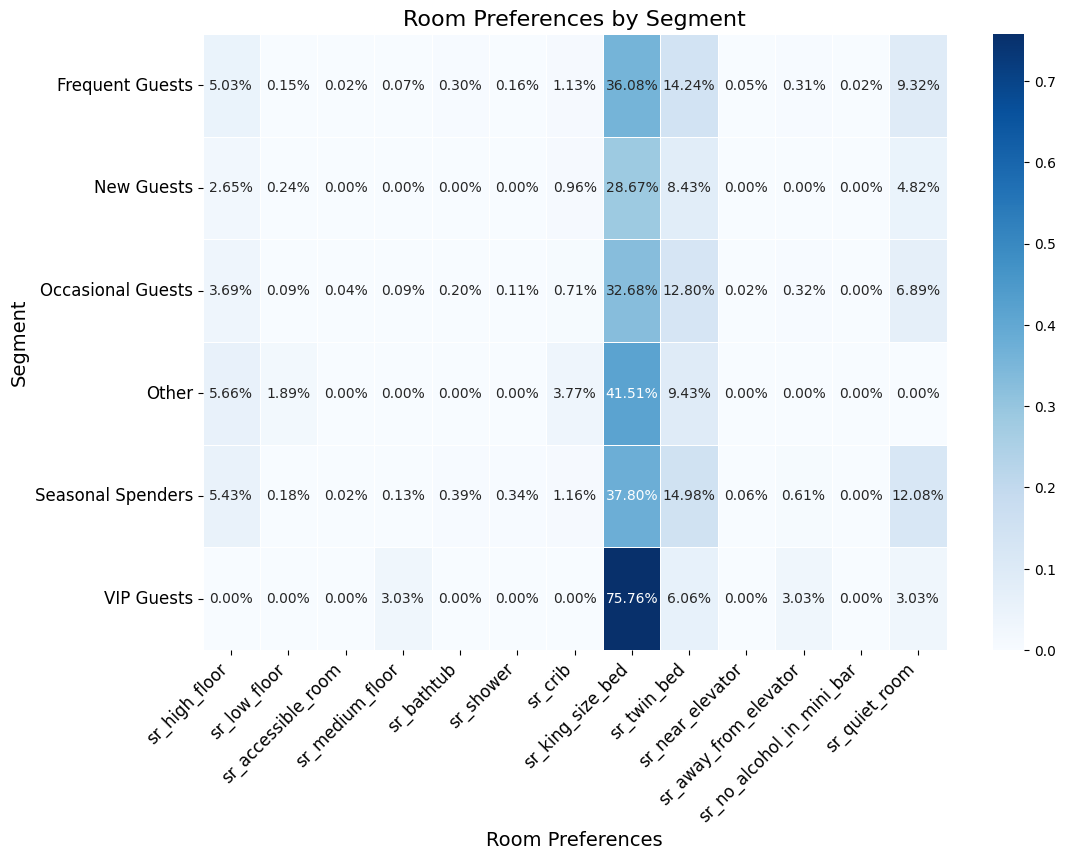

In [1108]:
sr_columns = ['sr_high_floor', 'sr_low_floor', 'sr_accessible_room', 'sr_medium_floor',
              'sr_bathtub', 'sr_shower', 'sr_crib', 'sr_king_size_bed', 'sr_twin_bed',
              'sr_near_elevator', 'sr_away_from_elevator', 'sr_no_alcohol_in_mini_bar',
              'sr_quiet_room']

preferences_by_segment = hotel_df.groupby('segment')[sr_columns].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(preferences_by_segment, annot=True, fmt=".2%", cmap="Blues", cbar=True, linewidths=0.5)
plt.title('Room Preferences by Segment', fontsize=16)
plt.ylabel('Segment', fontsize=14)
plt.xlabel('Room Preferences', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Lead Time

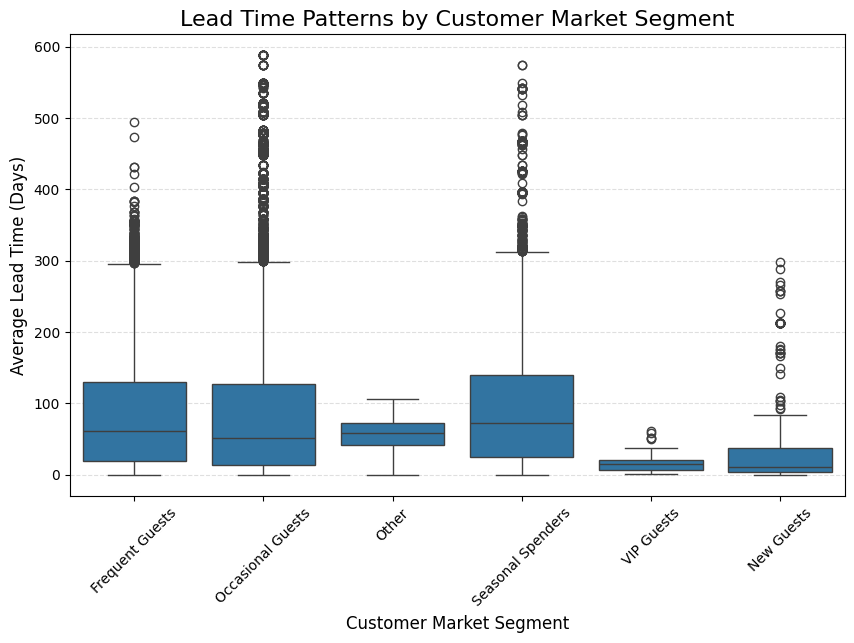

In [1122]:
# Boxplot for Average Lead Time by Customer Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=hotel_df, x='segment', y='average_lead_time')
plt.title('Lead Time Patterns by Customer Market Segment', fontsize=16)
plt.ylabel('Average Lead Time (Days)', fontsize=12)
plt.xlabel('Customer Market Segment', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

## Cancellation and No-Show Rates

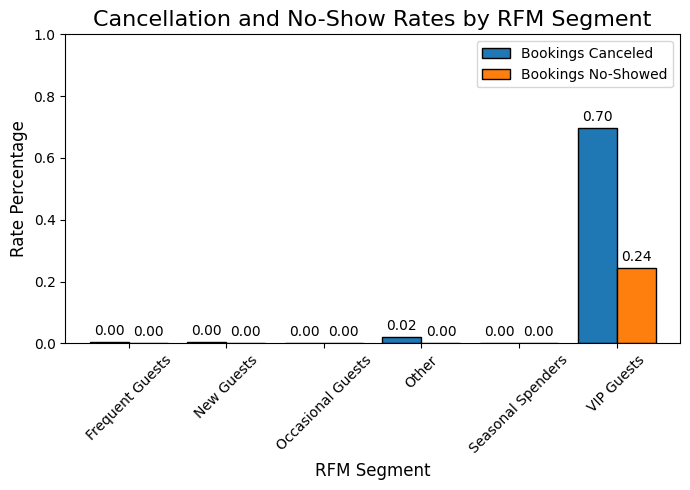

In [1123]:
# Cancellation and no-show rates
cancellation_rates = hotel_df.groupby('segment')[['bookings_canceled', 'bookings_no_showed']].mean()

ax = cancellation_rates.plot(kind='bar', figsize=(7, 5), edgecolor='black', width=0.8)
plt.ylim(0, 1) 
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.title('Cancellation and No-Show Rates by RFM Segment', fontsize=16)
plt.ylabel('Rate Percentage', fontsize=12)
plt.xlabel('RFM Segment', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(
    ['Bookings Canceled', 'Bookings No-Showed'], 
    fontsize=10,
    title_fontsize=12
)
plt.tight_layout()
plt.show()

# **Channel and Market Analysis**

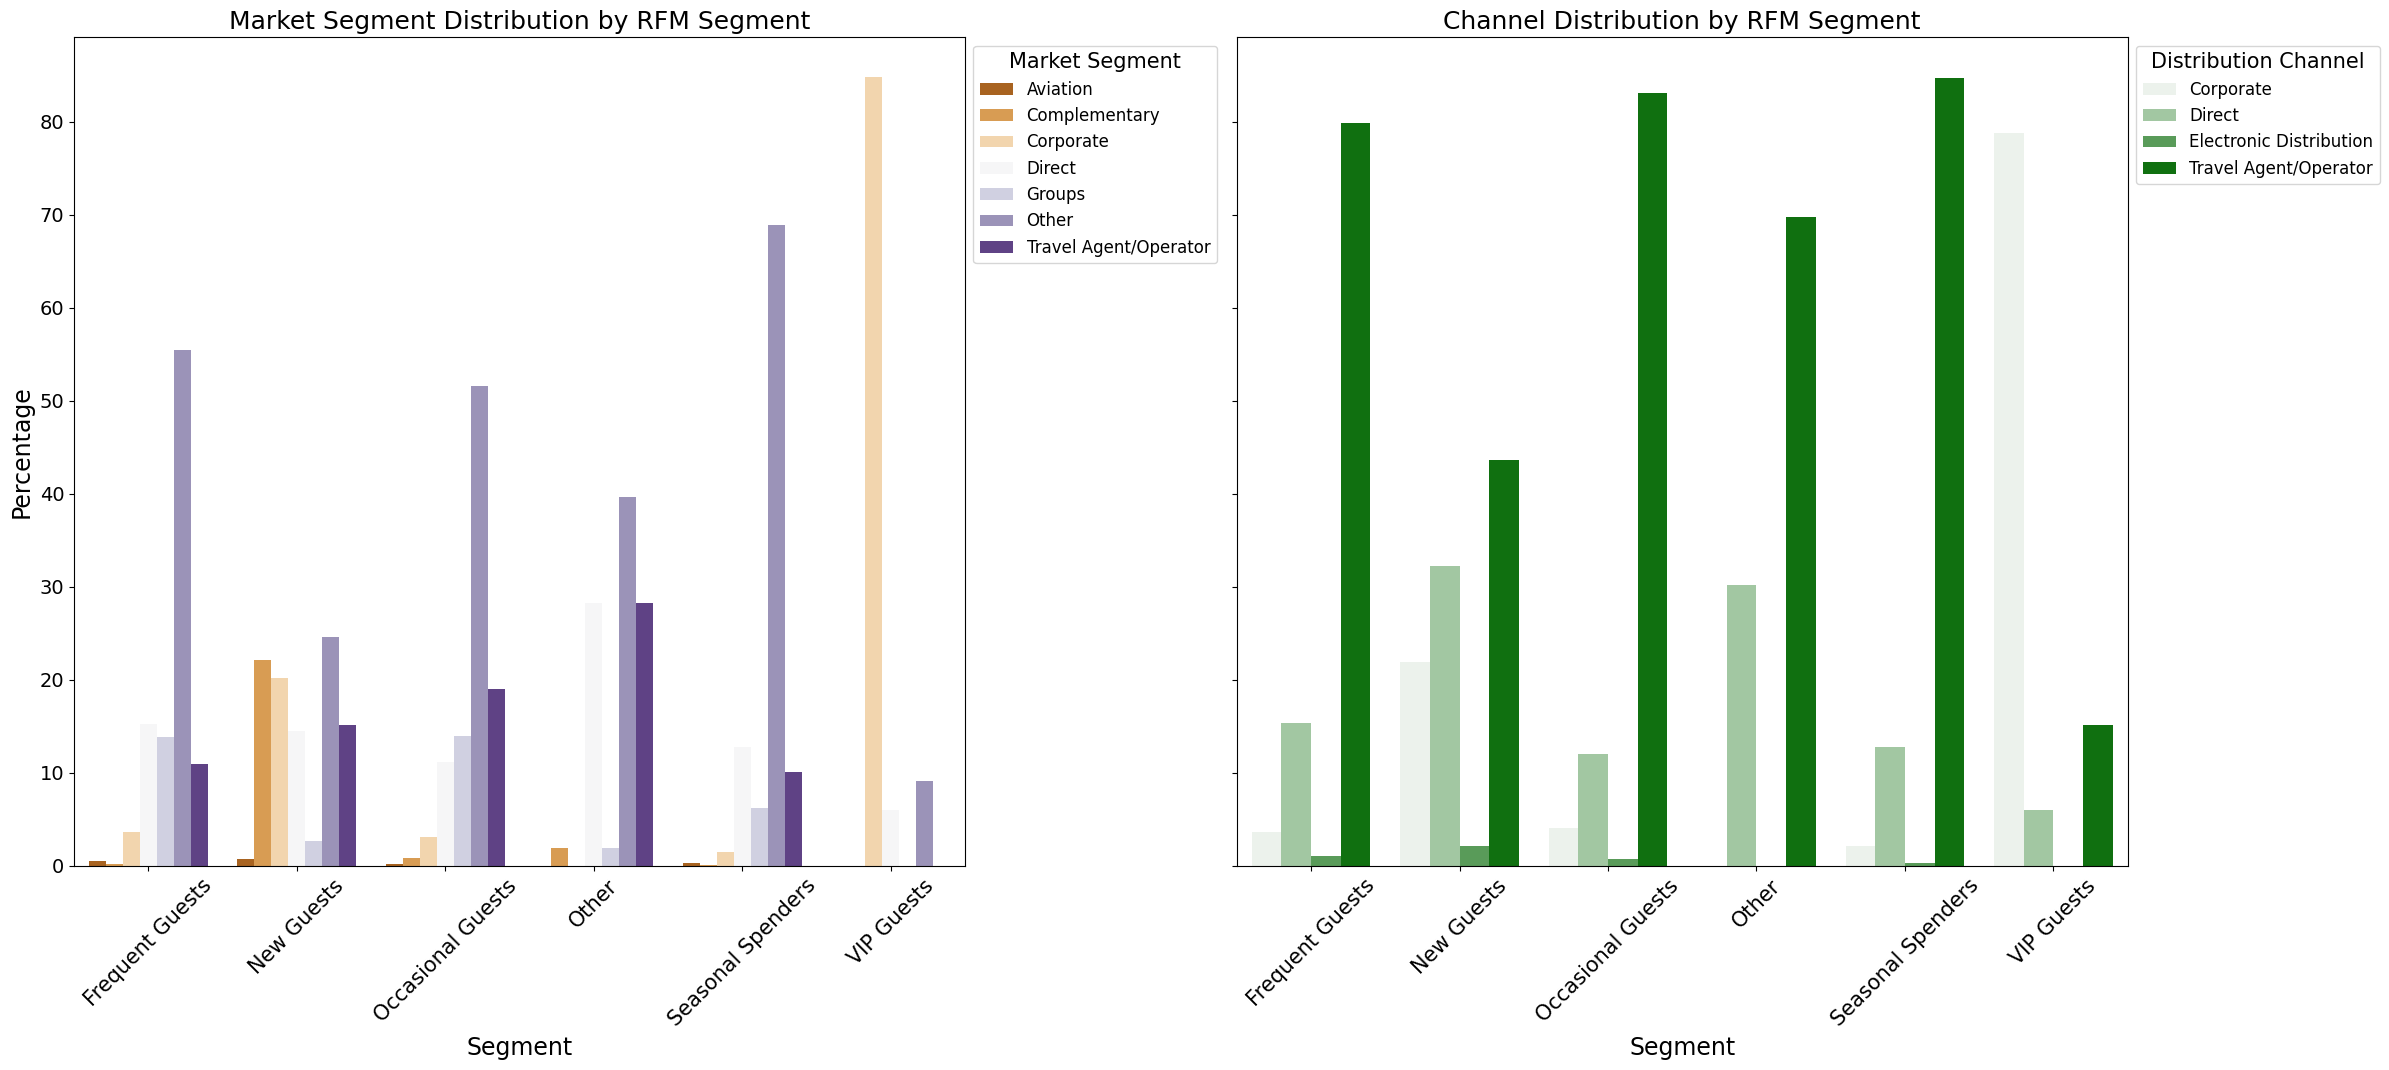

In [1111]:
market_segment_dist = hotel_df.groupby(['segment', 'market_segment']).size().reset_index(name='count')
market_segment_dist['percentage'] = market_segment_dist.groupby('segment')['count'].transform(lambda x: x / x.sum() * 100)

distribution_channel_dist = hotel_df.groupby(['segment', 'distribution_channel']).size().reset_index(name='count')
distribution_channel_dist['percentage'] = distribution_channel_dist.groupby('segment')['count'].transform(lambda x: x / x.sum() * 100)

max_market = market_segment_dist.loc[market_segment_dist.groupby('segment')['percentage'].idxmax()]
max_channel = distribution_channel_dist.loc[distribution_channel_dist.groupby('segment')['percentage'].idxmax()]

# Simplified Monochromatic Palette
palette_market = sns.color_palette("PuOr", n_colors=market_segment_dist['market_segment'].nunique())
palette_channel = sns.light_palette("green", n_colors=distribution_channel_dist['distribution_channel'].nunique())

fig, axes = plt.subplots(1, 2, figsize=(24, 12), sharey=True)

# Plot 1: Market Segment Distribution
sns.barplot(
    data=market_segment_dist, 
    x='segment', 
    y='percentage', 
    hue='market_segment', 
    ax=axes[0], 
    palette=palette_market
)
axes[0].set_title('Market Segment Distribution by RFM Segment', fontsize=18)
axes[0].set_ylabel('Percentage', fontsize=17)
axes[0].set_xlabel('Segment', fontsize=17)
axes[0].tick_params(axis='x', rotation=45, labelsize=15)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].legend(
    title='Market Segment', 
    fontsize=12, 
    title_fontsize=15, 
    loc='upper left', 
    bbox_to_anchor=(1, 1),
    ncol=1
)

# Plot 2: Distribution Channel Distribution
sns.barplot(
    data=distribution_channel_dist, 
    x='segment', 
    y='percentage', 
    hue='distribution_channel', 
    ax=axes[1], 
    palette=palette_channel
)
axes[1].set_title('Channel Distribution by RFM Segment', fontsize=18)
axes[1].set_ylabel('Percentage', fontsize=17)
axes[1].set_xlabel('Segment', fontsize=17)
axes[1].tick_params(axis='x', rotation=45, labelsize=15)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].legend(
    title='Distribution Channel', 
    fontsize=12, 
    title_fontsize=15, 
    loc='upper left', 
    bbox_to_anchor=(1, 1)
)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 
plt.show()


The hotel’s primary revenue channels are `Travel Agent/Operator` and `Direct`. Although `Travel Agent/Operator` has significantly more bookings (`68,569` vs. `11,912`), the average revenue per booking is slightly higher for the `Direct` channel (`€368.93` vs. €365.28). A U Test will be conducted to evaluate whether this difference is statistically significant and to explore the potential benefits of increasing direct bookings.

In [1112]:
direct_revenue = hotel_df[hotel_df['distribution_channel'] == 'Direct']['total_revenue']
travel_agent_revenue = hotel_df[hotel_df['distribution_channel'] == 'Travel Agent/Operator']['total_revenue']
result = mannwhitneyu(direct_revenue, travel_agent_revenue, alternative='two-sided')
print(f"U Test result= {result.statistic}, p-value={result.pvalue}")

U Test result= 382274822.0, p-value=2.4054842171716977e-29


The U Test result (statistic = 382,274,822.0, p-value = 2.4e-29) indicates a highly significant difference between the revenue distributions of the Direct and Travel Agent/Operator channels. This confirms that the observed difference in average revenue per booking is not due to random chance.

In [1113]:
# customers_table = hotel_df[['id', 'nationality', 'age', 'days_since_first_stay', 
#                             'days_since_last_stay', 'market_segment', 'distribution_channel','segment']]
# customers_table.to_csv('customers_table.csv', index=False, na_rep="NULL")
# revenue_table = hotel_df[['id', 'lodging_revenue', 'other_revenue', 'total_revenue']]
# revenue_table.to_csv('revenue_table.csv', index=False)
# bookings_table = hotel_df[['id', 'bookings_checked_in', 'bookings_no_showed',
#                            'bookings_canceled', 'average_lead_time', 'days_since_creation']]
# bookings_table.to_csv('bookings_table.csv', index=False)
# preferences_table = hotel_df[['id', 'sr_high_floor', 'sr_low_floor', 'sr_accessible_room', 
#                               'sr_medium_floor', 'sr_bathtub', 'sr_shower', 'sr_crib',
#                               'sr_king_size_bed', 'sr_twin_bed', 'sr_near_elevator',
#                               'sr_away_from_elevator', 'sr_no_alcohol_in_mini_bar', 'sr_quiet_room']]
# preferences_table.to_csv('preferences_table.csv', index=False)